In [11]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
from PIL import Image
import re

In [12]:
url = "https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2024-2025/labs/lab02/data/surveyDataSience.csv"
response = requests.get(url)

with open("surveyDataSience.csv", "wb") as file:
    file.write(response.content)
df_date = pd.read_csv('surveyDataSience.csv',delimiter=',', low_memory=False, skiprows=[1])

map_ed = {
    "Master’s degree": 5,
    "Doctoral degree": 8,
    "Bachelor’s degree": 3
}
df_date["educatie"] = df_date["Q4"].map(map_ed)

map_v = {
    "< 1 years": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 30
}
df_date["vechime"] = df_date["Q6"].map(map_v)

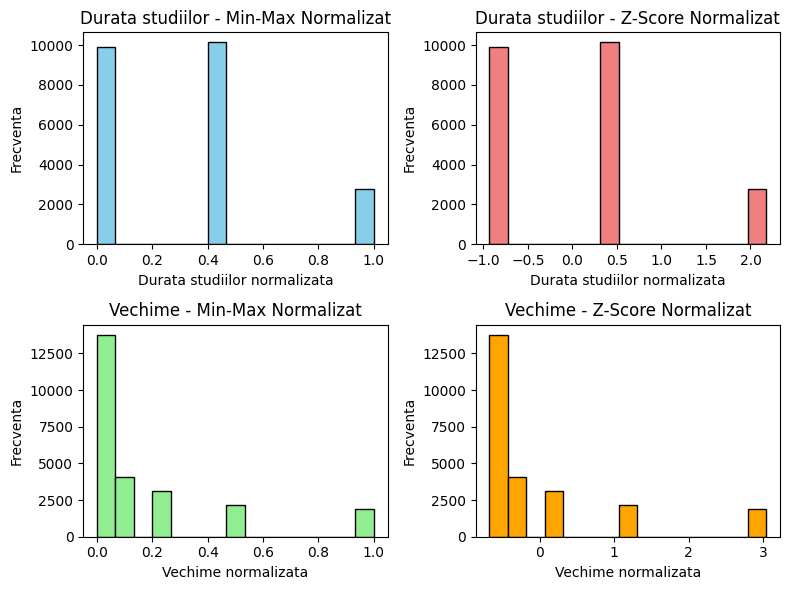

In [13]:
#normalizare durata anilor de studii universitare si vechimea in programare
def min_max_normalization(df, column_name):
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    return (df[column_name] - min_val) / (max_val - min_val)

def z_score_normalization(df, column_name):
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    return (df[column_name] - mean) / std_dev

df_date["educatie_min_max"] = min_max_normalization(df_date, "educatie")
df_date["educatie_z_score"] = z_score_normalization(df_date, "educatie")
df_date["vechime_min_max"] = min_max_normalization(df_date, "vechime")
df_date["vechime_z_score"] = z_score_normalization(df_date, "vechime")

plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.hist(df_date["educatie_min_max"].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Durata studiilor - Min-Max Normalizat')
plt.xlabel('Durata studiilor normalizata')
plt.ylabel('Frecventa')

plt.subplot(2, 2, 2)
plt.hist(df_date["educatie_z_score"].dropna(), bins=15, color='lightcoral', edgecolor='black')
plt.title('Durata studiilor - Z-Score Normalizat')
plt.xlabel('Durata studiilor normalizata')
plt.ylabel('Frecventa')

plt.subplot(2, 2, 3)
plt.hist(df_date["vechime_min_max"].dropna(), bins=15, color='lightgreen', edgecolor='black')
plt.title('Vechime - Min-Max Normalizat')
plt.xlabel('Vechime normalizata')
plt.ylabel('Frecventa')

plt.subplot(2, 2, 4)
plt.hist(df_date["vechime_z_score"].dropna(), bins=15, color='orange', edgecolor='black')
plt.title('Vechime - Z-Score Normalizat')
plt.xlabel('Vechime normalizata')
plt.ylabel('Frecventa')

plt.tight_layout()
plt.show()

In [14]:
folder_path = "pictures"
images = []
image_titles = []

for image_name in os.listdir(folder_path):
    path = os.path.join(folder_path, image_name)
    img = Image.open(path)
    images.append(np.array(img))
    image_titles.append(image_name)

num_images = len(images)
num_columns = 4
num_rows = (num_images + num_columns - 1) // num_columns


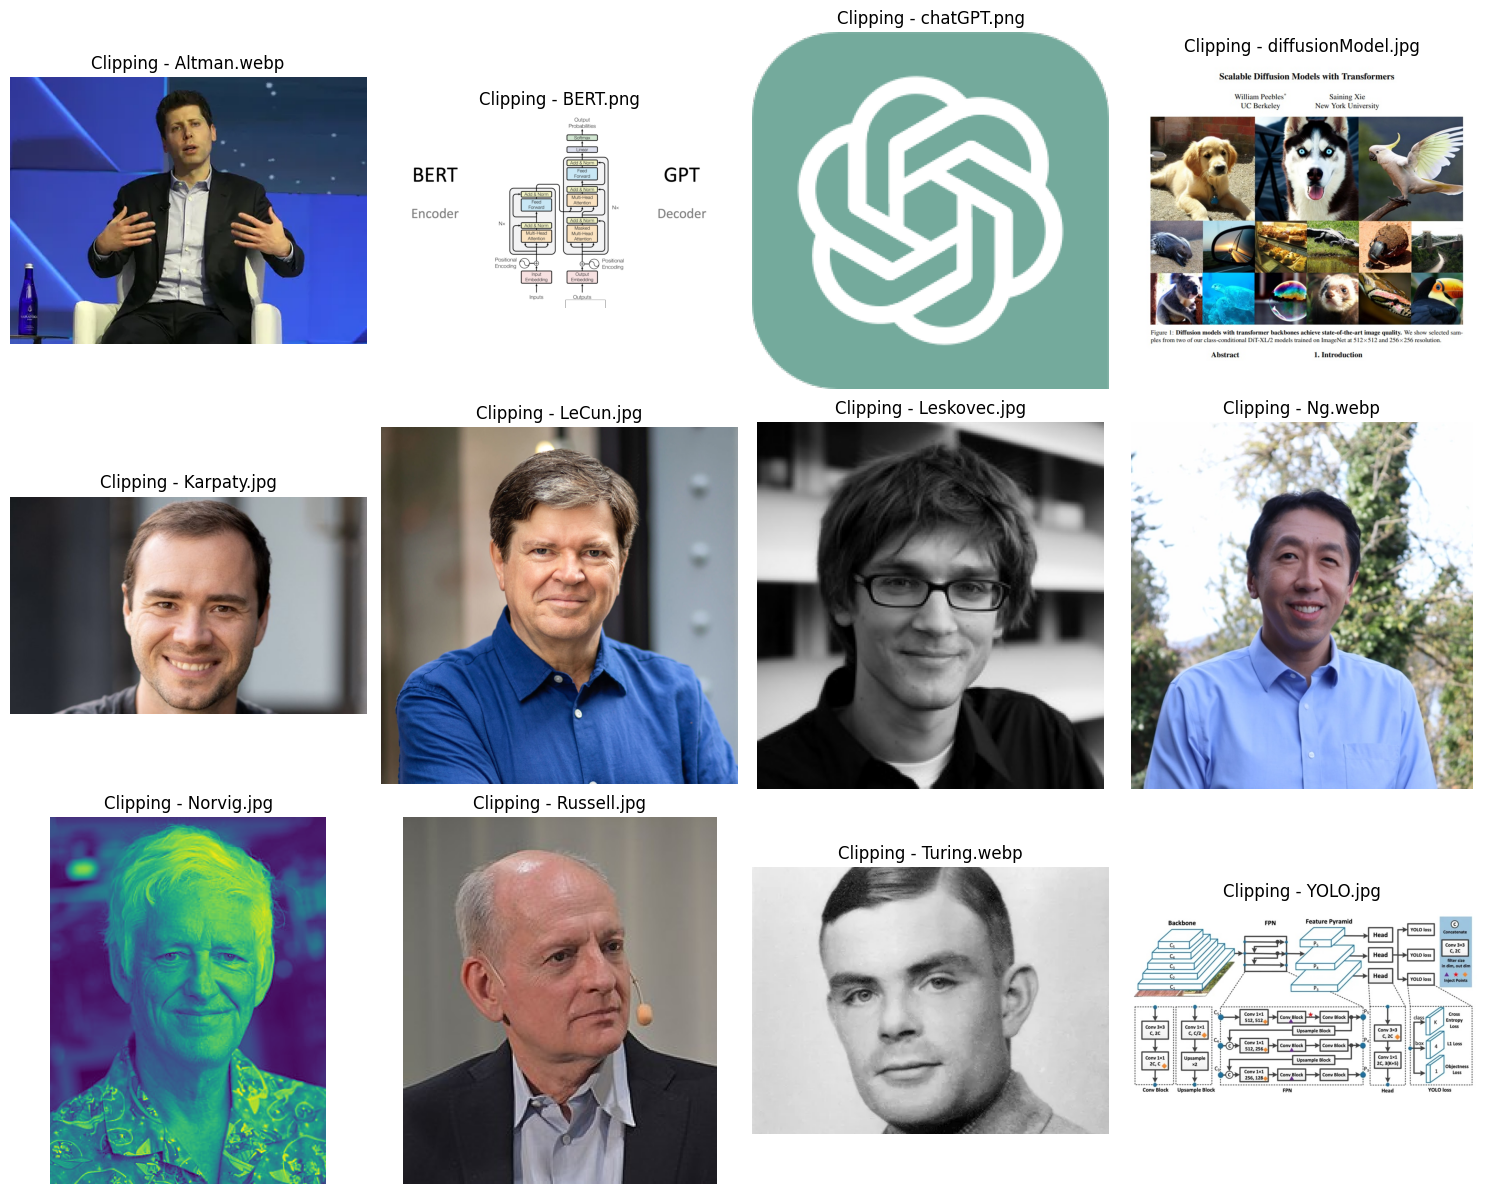

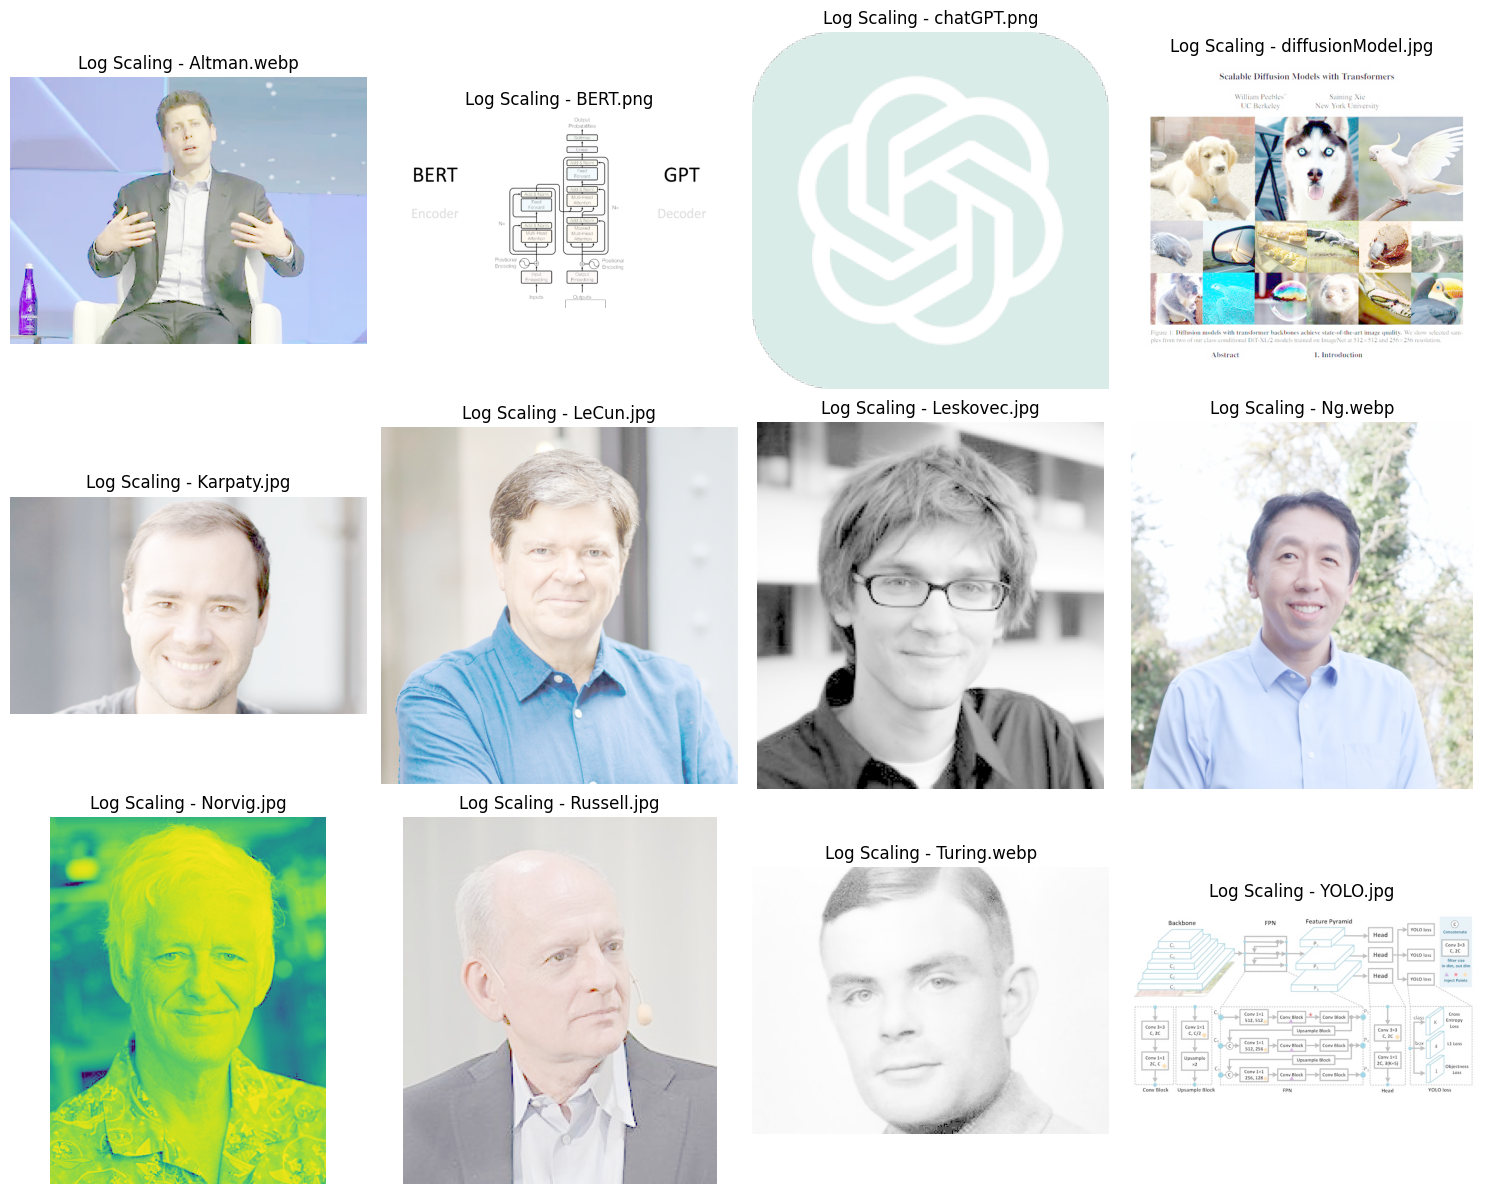

In [15]:
#normalizare valorile pixelilor din imagini
def clipping(img, lower_bound=0, upper_bound=255):
    return np.clip(img, lower_bound, upper_bound)

def log_scaling(img):
    img_log = np.log1p(img)
    return np.uint8(np.interp(img_log, (img_log.min(), img_log.max()), (0, 255)))

clipped_images = [np.clip(img, 0, 255) for img in images]
log_scaled_images = [np.uint8(np.interp(np.log1p(img), (np.log1p(img).min(), np.log1p(img).max()), (0, 255))) for img in images]

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4 * num_rows))
for i in range(num_rows):
    for j in range(num_columns):
        index = i * num_columns + j
        if index < len(clipped_images):
            axes[i, j].imshow(clipped_images[index])
            axes[i, j].set_title(f"Clipping - {image_titles[index]}")
            axes[i, j].axis('off')
        else:
            axes[i, j].axis('off')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4 * num_rows))
for i in range(num_rows):
    for j in range(num_columns):
        index = i * num_columns + j
        if index < len(log_scaled_images):
            axes[i, j].imshow(log_scaled_images[index])
            axes[i, j].set_title(f"Log Scaling - {image_titles[index]}")
            axes[i, j].axis('off')
        else:
            axes[i, j].axis('off')
plt.tight_layout()
plt.show()

In [16]:
# Citirea textului din fișier și numărarea cuvintelor pe propoziție
with open('texts.txt', 'r', encoding='utf-8') as r:
    text = r.read()

sentences = re.split(r'[.!?]', text)
sentences = [sentence.replace("\n", "").strip() for sentence in sentences if sentence.strip()]
words = re.findall(r'\w+', text)

word_counts = []
for sentence in sentences:
    words_in_sentence = re.findall(r'\w+', sentence.lower())
    word_count = {}
    for word in words_in_sentence:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1
    word_counts.append(word_count)

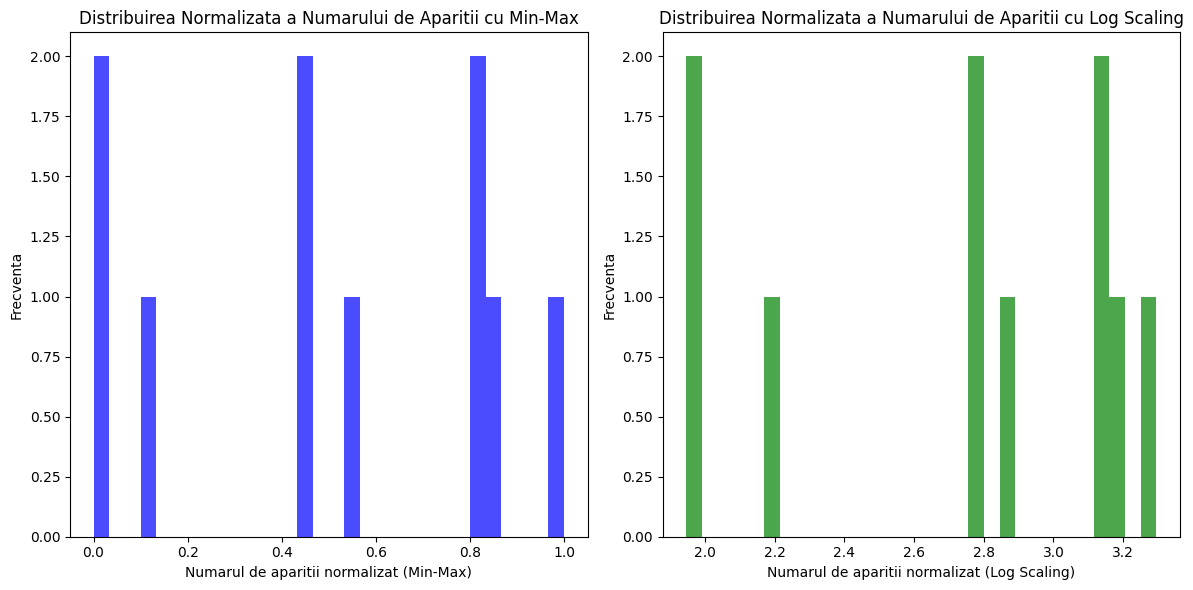

In [17]:
#normalizare numarul de aparitii a cuvintelor la nivelul unei propozitii.
def min_max_normalization(counts, min_val, max_val):
    return (counts - min_val) / (max_val - min_val) if max_val - min_val != 0 else 0

def log_scaling(counts):
    return np.log1p(counts)  

all_counts = [sum(counts.values()) for counts in word_counts]
min_val = min(all_counts)
max_val = max(all_counts)
normalized_counts_min_max = [min_max_normalization(sum(counts.values()), min_val, max_val) for counts in word_counts]
normalized_counts_log = [log_scaling(sum(counts.values())) for counts in word_counts]

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.hist(normalized_counts_min_max, bins=30, color='blue', alpha=0.7)
plt.xlabel('Numarul de aparitii normalizat (Min-Max)')
plt.ylabel('Frecventa')
plt.title('Distribuirea Normalizata a Numarului de Aparitii cu Min-Max')

plt.subplot(1,2,2)
plt.hist(normalized_counts_log, bins=30, color='green', alpha=0.7)
plt.xlabel('Numarul de aparitii normalizat (Log Scaling)')
plt.ylabel('Frecventa')
plt.title('Distribuirea Normalizata a Numarului de Aparitii cu Log Scaling')
plt.tight_layout()
plt.show() 